# Importa pacotes

In [1]:
#----
#calculo numérico
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
from scipy.optimize import curve_fit # pacote para ajuste de curvas
#----
#navegar pelo sistema de arquivos
import os #com
import glob
#---
#desenhar circuitos
import SchemDraw as schem
import SchemDraw.elements as e
#----
#pacote para gráficos interativos
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import  init_notebook_mode 
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

# Fazendo uma previsão dos valores para viabilizar o experimento

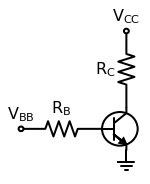

In [4]:
d = schem.Drawing(unit=2.5)
VB = d.add(e.DOT_OPEN, label='$V_{BB}$')
RB = d.add(e.RES, d='right',label='$R_{B}$')
bjt = d.add(e.BJT_NPN_C, d='right')
#----
Rc = d.add(e.RES, d='up', xy=bjt.collector, label='$R_C$')
Vcc = d.add(e.DOT_OPEN, label='$V_{CC}$')
#RE = d.add(e.RES, d='down', xy=bjt.emitter, label='$R_E$')
gnd = d.add(e.GND,xy=bjt.emitter)
d.draw()

# Carrega dados

In [5]:
os.getcwd() # aonde estou?

'/Users/gsw/GitHub/F540_jbook/guides/exp3a/dados'

In [41]:
#Colocando nomes das pastas e arquivos
path = os.getcwd()
#listar todos arquivos medidos para meia-onda
file_list = sorted(glob.glob('*.csv' ))
pd.Series(file_list)


0    dados_Ic_vs_Ib_Vbb_Vcc_15p5V.csv
1              dados_Vce_Vcc_15p5.csv
dtype: object

In [72]:
file = file_list[1]
print(file)
df = pd.read_csv(file,sep=',') # DataFrame segundo Pandasdf
# df.columns=['tempo(s)','Vbb(V)','Vbe(V)','Vce(V)']
df.head()

dados_Vce_Vcc_15p5.csv


,Rc(Ohm),Vce_rb_10k(V),Vce_rb_12k(V)k,Vce_rb_15k(V),Vce_rb_20k(V)
0,100,13.86,14.10,14.29,14.43
1,200,12.82,13.22,13.61,13.89
2,300,11.75,12.40,12.87,13.32
3,400,10.71,11.57,12.20,12.81
4,500,9.70,10.70,11.54,12.28


In [30]:
# df.to_csv('dados_Ic_vs_Ib.csv',index=False)

# Analisando dados

Com base nos dados acima, podemos determinar as correntes fluindo pela malha da base e pela malha do coletor. A corrente da base será dada pela lei de Ohm no resistor da base: $$I_B = \frac{V_{BB}-V_{BE}}{R_B}.$$
Já a corrente no coletor será dada por pela lei de Ohm no resistor do coletor: $$I_C = \frac{V_{CC}-V_{CE}}{R_C}.$$

In [54]:
#---------------------------
Rb=10e3 # resistor de base
df['Ib(mA)']=1e3*(df['Vbb(V)']-df['Vbe(V)'])/Rb
#---------------------------
Rc=220 # resistor do coletor
Vcc = 15 # tensao Vcc
df['Ic(mA)']=1e3*(Vcc-df['Vce(V)'])/Rc

In [32]:
Vγ = 0.7
β = 150
Rb = 2.2e3
Rc = 47
Vcc = 15
Ic_max = Vcc/Rc
Vbb_max = 1/β*(Rb/Rc)*Vcc+Vγ
print('Ic_max (mA) =',Ic_max*1e3)
print('Vbb_max=',Vbb_max)

Ic_max (mA) = 319.1489361702128
Vbb_max= 5.380851063829788


In [33]:
Vγ = 0.7
β = 150
Rb = 2.2e3
Rc = 47
Vcc = 15
Ic_max = Vcc/Rc
Vbb_max = (Ic_max/β)*Rb*Vcc+Vγ
print('Ic_max (mA) =',Ic_max*1e3)
print('Vbb_max=',Vbb_max)

Ic_max (mA) = 319.1489361702128
Vbb_max= 70.91276595744681


Determinando Rc

In [34]:
Vc_max = 10
Ic_max = 50e-3
Rc_total = Vc_max/Ic_max
print(Rc_total)
print(Rc_total-50)

200.0
150.0


In [35]:
Vγ = 0.7
β = 150
Vbb = 5
Vcc = 15
Ic_max = 50e-3
Rb_min = (Vbb-Vγ)*β/Ic_max
print('Rb_min=',Rb_min)

Rb_min= 12900.0


In [36]:
Vγ = 0.7
β = 150
Vbb = 5
Vcc = 15
Ic_max = 1e-3*np.array([5,10,20,30,40])
Rb_min = (Vbb-Vγ)*β/Ic_max
print('Rb_min (k)=',Rb_min*1e-3)

Rb_min (k)= [129.     64.5    32.25   21.5    16.125]


In [37]:
np.array([5,10,20,30,40])

array([ 5, 10, 20, 30, 40])

## Graficando dados brutos

In [38]:
0.5036-0.05032

0.45328000000000007

In [40]:
traces = []
#----
x0 = df['tempo(s)']
y0 = df['Vbb(V)']
traces.append(go.Scatter(x=x0, y=y0,mode='markers',name='Vbb'))

x0 = df['tempo(s)']
y0 = df['Vbe(V)']
traces.append(go.Scatter(x=x0, y=y0,mode='markers',name='Vbe'))

x0 = df['tempo(s)']
y0 = df['Ib(mA)']
traces.append(go.Scatter(x=x0, y=y0,mode='markers',name='Ib'))
#adicionando traços
fig = make_subplots(rows=3, cols=1,shared_xaxes=True,vertical_spacing=0.02)
fig = fig.add_trace(traces[0], row=1, col=1)
fig = fig.add_trace(traces[1], row=2, col=1)
fig = fig.add_trace(traces[2], row=3, col=1)
#ajustando layout
layout_dict = {'title': file,
              'height' : 600,
              'width' : 600}
fig.update_layout(layout_dict)
fig.update_yaxes(title_text='Tensão (V)', row=1, col=1)
fig.update_yaxes(title_text='Tensão (V)', row=2, col=1)
fig.update_yaxes(title_text='Corrente (mA)', row=3, col=1)
fig.update_xaxes(title_text='Tempo (s)', row=3, col=1)

## Impacto da digitalização do osciloscópio

Note que a curva Vbe está com baixa digitalização. Com base no vídeo, percebi que a escala vertical do canal 2 é de 2V/div, como a tela tem 10 divisões e o osciloscópio captura em 8 bits, teremos uma digitalização de $$\delta V = \frac{20}{2^8}\approx78 mV.$$
Se vocês olharem o gráfico, perceberão que é justamente este o caso. O histograma dos valores de ```diff(Vbe)``` também evidencia isto: os satélites da distribuição estão justamente em 80 mV.

In [48]:
df['Vbe(V)']

0       0.72
1       0.72
2       0.72
3       0.72
4       0.72
        ... 
2495    0.72
2496    0.72
2497    0.72
2498    0.72
2499    0.72
Name: Vbe(V), Length: 2500, dtype: float64

In [47]:
np.diff(df['Vbe(V)'])

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
fig2 = go.Figure(data=[go.Histogram(x=df['Vbe(V)'])])
fig2.update_yaxes(title_text='Número de pontos')
fig2.update_xaxes(title_text='$\delta V$')
#ajustando layout
layout_dict = {'title': 'Discretização dos valores de Vbe',
              'height' : 500,
              'width' : 500}
fig2.update_layout(layout_dict)

In [49]:
fig2 = go.Figure(data=[go.Histogram(x=np.diff(df['Vbe(V)']))])
fig2.update_yaxes(title_text='Número de pontos')
fig2.update_xaxes(title_text='$\delta V$')
#ajustando layout
layout_dict = {'title': 'Discretização dos valores de Vbe',
              'height' : 500,
              'width' : 500}
fig2.update_layout(layout_dict)

In [51]:
fig2 = go.Figure(data=[go.Histogram(x=np.diff(df['Vbb(V)']))])
fig2.update_yaxes(title_text='Número de pontos')
fig2.update_xaxes(title_text='$\delta V$')
#ajustando layout
layout_dict = {'title': 'Discretização dos valores de Vbb',
              'height' : 500,
              'width' : 500}
fig2.update_layout(layout_dict)

## Analisando o valor de β (Ic vs. Vbe)

In [58]:
traces = []
#----
x0 = df['Ib(mA)']
y0 = df['Ic(mA)']
traces.append(go.Scatter(x=np.arange(1,len(x0)), y=x0, mode='markers', name='Vbb'))
traces.append(go.Scatter(x=np.arange(1,len(x0)), y=y0, mode='markers', name='Vbb'))
#adicionando traços
fig3 = make_subplots(rows=2, cols=1,shared_xaxes=True,vertical_spacing=0.02)
fig3 = fig3.add_trace(traces[0], row=1, col=1)
fig3 = fig3.add_trace(traces[1], row=2, col=1)
#ajustando layout
layout_dict = {'title': 'determinando β (Ic vs. Ib)',
              'height' : 500,
              'width' : 700}
fig3.update_layout(layout_dict)
fig3.update_yaxes(title_text='Ib (mA)', row=1, col=1)
fig3.update_yaxes(title_text='Ic (mA)', row=2, col=1)
# fig3.update_yaxes(title_text='Vc (V)', row=2, col=1)
#fig3.update_xaxes(title_text='Tempo (s)', row=2, col=1)

In [67]:
df2 = df.iloc[1200:-1]

In [69]:
traces = []
#----
# x0 = df['Ib(mA)'][1280:-1]
# y0 = df['Ic(mA)'][1280:-1]
x0 = df2['Ib(mA)']
y0 = df2['Ic(mA)']
traces.append(go.Scatter(x=x0, y=y0, mode='markers', name='Vbb'))
#adicionando traços
fig3 = go.Figure()
fig3 = fig3.add_trace(traces[0])
#ajustando layout
layout_dict = {'title': 'determinando β (Ic vs. Ib)',
              'height' : 500,
              'width' : 700}
fig3.update_layout(layout_dict)
fig3.update_yaxes(title_text='Ic (mA)')
fig3.update_xaxes(title_text='Ib (mA)')
# fig3.update_yaxes(title_text='Vc (V)', row=2, col=1)
#fig3.update_xaxes(title_text='Tempo (s)', row=2, col=1)

In [71]:
mask


0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Name: Ib(mA), Length: 2500, dtype: bool

In [70]:
#---------
def funcfit(x,*p):
    #funcao de ajuste
    #note o * antes do vetor de parâmetros! 
    # em python isto permite que p possa 
    # representar uma sequencia de argumentos: https://realpython.com/courses/python-kwargs-and-args/
    return p[0]+p[1]*x 
#--------
mask = df['Ib(mA)']<0.4 # região linear do gráfico!
x0 = df[mask]['Ib(mA)'].values
y0 = df[mask]['Ic(mA)'].values
#-------------
pfit, pcov = curve_fit(funcfit, x0,y0, p0=[0,0])
#-------
sigma = np.sqrt(np.diag(pcov))
#-------
print('Resultados do ajuste:')
print('coef. linear = {:1.5g} \n coef. angular = {:1.5g}'.format(pfit[0],pfit[1]))
print('Incertezas (com 2 algarismos significativos):')
print('coef. linear = {:.2g}\n coef. angular = {:.2g}'.format(sigma[0],sigma[1]))
#print('c=',c0)

Resultados do ajuste:
coef. linear = -0.024592 
 coef. angular = 156.39
Incertezas (com 2 algarismos significativos):
coef. linear = 0.024
 coef. angular = 0.11


In [27]:
yfit = funcfit(x0,pfit[0],pfit[1]) # calculando a função ajustada 
label = 'ajuste: β={:1.5g}({:.2g})'.format(pfit[1],sigma[1]) # legenda para gráfico
trace = go.Scatter(x=x0, y=yfit, mode='lines', name=label) 
fig3 = fig3.add_trace(trace)
fig3.show()

In [16]:
fig3.write_image("fig_beta.pdf")

ValueError: Image generation requires the psutil package.

Install using pip:
    $ pip install psutil

Install using conda:
    $ conda install psutil
